In [1]:
import os
import numpy as np
import pandas as pd
from arcgis.features import GeoAccessor, GeoSeriesAccessor

In [2]:
lv_igraph = pd.DataFrame.spatial.from_featureclass(r"E:\Projects\igraph\Post_Process_Bike_Model_Outputs\Outputs\links_bv.shp")
lv_old = pd.DataFrame.spatial.from_featureclass(r"E:\Projects\igraph\Post_Process_Bike_Model_Outputs\Default.gdb\links_bv_old")

In [3]:
lv_old.columns

Index(['OBJECTID', 'Join_Count', 'TARGET_FID', 'Join_Count_1',
       'link_id_igraph', 'total_bvol_old', 'ft_bvol_old', 'tf_bvol_old',
       'SHAPE'],
      dtype='object')

In [4]:
lv_igraph = lv_igraph[['link_id', 'ft_bvol', 'tf_bvol', 'total_bvol']]
lv_old = lv_old[['link_id_igraph', 'ft_bvol_old', 'tf_bvol_old', 'total_bvol_old']]

In [15]:
lv = lv_igraph.merge(lv_old, left_on='link_id', right_on='link_id_igraph', how='inner')
lv['total_bvol_old'] = lv['total_bvol_old'].astype(float)

In [30]:
lv[(lv['total_bvol']>12000) & (lv['total_bvol_old']<1000)]

,link_id,ft_bvol,tf_bvol,total_bvol,link_id_igraph,ft_bvol_old,tf_bvol_old,total_bvol_old
84759,88785.0,4126.815406,7873.798316,12000.613722,88785.0,116.230988692377,14.0768266176864,130.307815
84845,88872.0,4103.411239,8012.006618,12115.417857,88872.0,85.3391916980807,115.8997392439,201.238931
85060,89090.0,4067.932159,8105.691944,12173.624103,89090.0,36.8633752113028,113.946300211006,150.809675
85682,89722.0,4072.335031,8141.071543,12213.406574,89722.0,36.8633752113028,113.946300211006,150.809675
85936,89992.0,4153.098149,8019.134939,12172.233088,89992.0,16.6716355465319,155.482298289747,172.153934
85975,90034.0,4144.492767,8012.264192,12156.756959,90034.0,10.0761930323672,172.480212010385,182.556405
89944,94123.0,3976.580576,8524.595213,12501.175789,94123.0,85.8204893953734,26.5003411518075,112.320831
90031,94215.0,3912.943816,8559.275911,12472.219728,94215.0,25.4573520491063,62.8951288770395,88.352481
90098,94283.0,3912.943816,8559.275911,12472.219728,94283.0,14.2852197454858,51.722996573419,66.008216
90691,94896.0,3708.095741,10516.219771,14224.315513,94896.0,104.221715606451,591.310719959979,695.532436


In [36]:
lv[['total_bvol','total_bvol_old']].corr()

,total_bvol,total_bvol_old
total_bvol,1.000000,0.645941
total_bvol_old,0.645941,1.000000


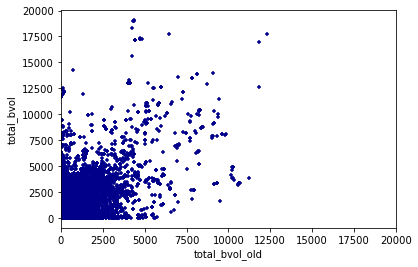

In [27]:
lv.plot.scatter(x='total_bvol_old', y='total_bvol', c='DarkBlue',s=10,marker='+', xlim=[0,20000])